Myopic deconvolution algorithm from

Thibon, Louis, Ferréol Soulez, and Éric Thiébaut. _Fast automatic
myopic deconvolution of angiogram sequence_. In International
Symposium on Biomedical Imaging. Beijing, China, 2014. https://hal.archives-ouvertes.fr/hal-00914846.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_float
from auto_metro.image_decorr import _fft, _ifft
from auto_metro.myopic_deconv import opt_gml, modes, zernike_tf

from scipy.optimize import minimize

In [30]:
image = img_as_float(imread("../samples/corti00.tif"))
nx, ny = image.shape

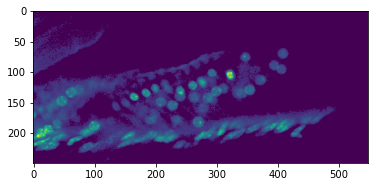

In [31]:
plt.imshow(image)

In [32]:
modes

[(0, 0), (2, -2), (2, 2), (3, -3), (3, -1), (3, 1), (3, 3), (4, 0)]

In [33]:
len(modes)

8

In [34]:
resolution = 6
pupil = 6 / np.pi

p0 = [10, 1, pupil, 1, 0, 0, 0, 0, 0, 0, 0]

In [35]:
image_dsp = np.abs(_fft(image))**2


res = minimize(opt_gml, p0, args=(image_dsp,), method='L-BFGS-B')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'


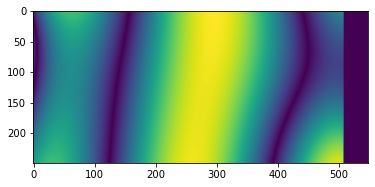

In [37]:
print(res.message)

pupil = res.x[2]
amps = res.x[3:]

tf = zernike_tf(*image.shape, pupil, amps)

plt.imshow(np.abs(tf))

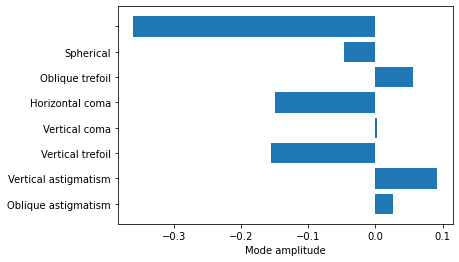

In [38]:
mode_names = [
    "Fundamental",
    "Oblique astigmatism",
    "Vertical astigmatism",
    "Vertical trefoil",
    "Vertical coma",
    "Horizontal coma",
    "Oblique trefoil",
    "Spherical",
]
fig, ax = plt.subplots()
b = ax.barh(np.arange(amps.size), amps)
ax.set_yticklabels(mode_names)
_ = ax.set_xlabel('Mode amplitude')


In [39]:
psf = np.abs(_ifft(tf))

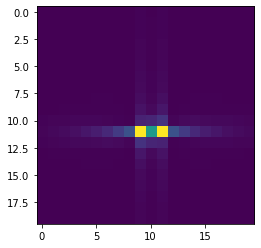

In [40]:
plt.imshow(psf[nx//2-10: nx//2+10, ny//2-10: ny//2+10])

In [41]:
from skimage.restoration import wiener

In [42]:
deconved = wiener(image, psf, 1)

In [43]:
deconved.ptp()

0.11060580830846847

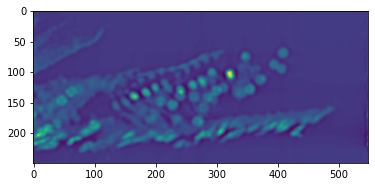

In [44]:
plt.imshow(deconved)

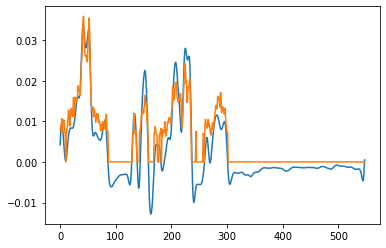

In [45]:
fig, ax = plt.subplots()
ax.plot(deconved[150, :])
ax.plot(image[150, :])
